In [2]:
# Data Preprocessing

In [3]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
# Importing the dataset
df = pd.read_csv('flats.csv', sep=';')

In [5]:
df

,rooms,location,condition,m2,type,price
0,2.0,suburbs,repaired,50,used,35000
1,1.0,center,repaired,37,used,35000
2,3.0,suburbs,repaired,67,used,65000
3,NaN,suburbs,repaired,21,used,15000
4,1.0,suburbs,repaired,82,NaN,60000
...,...,...,...,...,...,...
212,2.0,center,unrepaireded,65,new,46407
213,3.0,center,unrepaireded,84,new,57678
214,3.0,center,unrepaireded,93,new,63513
215,2.0,center,unrepaireded,72,new,51121


In [6]:
df[['rooms','location','condition','m2','type','price']].describe()

,rooms,m2,price
count,216.000000,217.000000,217.000000
mean,2.013889,76.331797,82427.451613
std,0.971593,38.019982,82183.660820
min,1.000000,21.000000,1.000000
25%,1.000000,49.000000,39429.000000
50%,2.000000,67.000000,59548.000000
75%,3.000000,91.000000,90000.000000
max,6.000000,280.000000,750000.000000


In [7]:
# Cheking NaN
df['rooms'].unique(), df['location'].unique(), df['condition'].unique(), df['m2'].unique(), df['type'].unique(), df['price'].unique()

(array([ 2.,  1.,  3., nan,  6.,  4.,  5.]),
 array(['suburbs', 'center'], dtype=object),
 array(['repaired', 'unrepaireded'], dtype=object),
 array([ 50,  37,  67,  21,  82,  45,  41,  63,  38,  35, 163,  40,  44,
         53,  65, 215,  78, 143,  68,  57,  54, 100,  60,  70,  84,  83,
         58, 205, 146,  48,  69, 140,  74, 280,  76, 112, 118, 212,  66,
         56,  64,  75,  73,  88,  43, 107,  52,  94,  79,  81,  77,  90,
        117, 126,  97, 105, 137, 114, 123, 128, 189,  86,  49,  55,  46,
         51,  91,  85, 106, 103, 149, 168,  30,  42,  89,  93,  28,  39,
         36, 108, 122, 113,  61,  71,  80,  95, 102, 132, 125, 133, 141,
        127,  33,  72], dtype=int64),
 array(['used', nan, 'new'], dtype=object),
 array([ 35000,  65000,  15000,  60000,  85000,  48000,  30000,  46000,
         33000,  29000,  25000, 170000,  53000,  58000, 750000,  96000,
        250000,  36000,  52000, 120000,  49000,  40000, 130000,  83000,
         63000,  70000, 650000,  90000,  46500,  

In [8]:
# Taking care of missing data
from sklearn.impute import SimpleImputer
#numeric
imputer_mean = SimpleImputer(missing_values=np.nan, strategy='mean').fit(df[['rooms']])
df[['rooms']] = imputer_mean.fit_transform(df[['rooms']])
df[['rooms']] = round(df[['rooms']])
#strings
imputer_freq = SimpleImputer(missing_values=np.nan, strategy='most_frequent').fit(df[['type']])
df[['type']] = imputer_freq.fit_transform(df[['type']])

In [9]:
df

,rooms,location,condition,m2,type,price
0,2.0,suburbs,repaired,50,used,35000
1,1.0,center,repaired,37,used,35000
2,3.0,suburbs,repaired,67,used,65000
3,2.0,suburbs,repaired,21,used,15000
4,1.0,suburbs,repaired,82,new,60000
...,...,...,...,...,...,...
212,2.0,center,unrepaireded,65,new,46407
213,3.0,center,unrepaireded,84,new,57678
214,3.0,center,unrepaireded,93,new,63513
215,2.0,center,unrepaireded,72,new,51121


In [21]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder
df[['location']] = LabelEncoder().fit_transform(df[['location']])
df[['condition']] = LabelEncoder().fit_transform(df[['condition']])
df[['type']] = LabelEncoder().fit_transform(df[['type']])

C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [11]:
df

,rooms,location,condition,m2,type,price
0,2.0,1,0,50,1,35000
1,1.0,0,0,37,1,35000
2,3.0,1,0,67,1,65000
3,2.0,1,0,21,1,15000
4,1.0,1,0,82,0,60000
...,...,...,...,...,...,...
212,2.0,0,1,65,0,46407
213,3.0,0,1,84,0,57678
214,3.0,0,1,93,0,63513
215,2.0,0,1,72,0,51121


In [12]:
# Descriptive Statistics
df[['rooms','m2', 'price']].describe()

,rooms,m2,price
count,217.000000,217.000000,217.000000
mean,2.013825,76.331797,82427.451613
std,0.969341,38.019982,82183.660820
min,1.000000,21.000000,1.000000
25%,1.000000,49.000000,39429.000000
50%,2.000000,67.000000,59548.000000
75%,3.000000,91.000000,90000.000000
max,6.000000,280.000000,750000.000000


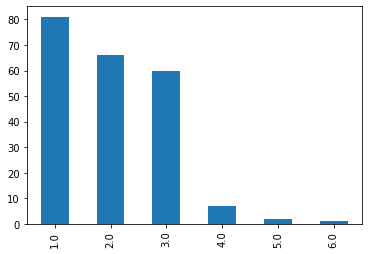

In [13]:
# Rooms number distribution
distribution = df['rooms'].value_counts()
distribution.plot(kind='bar')

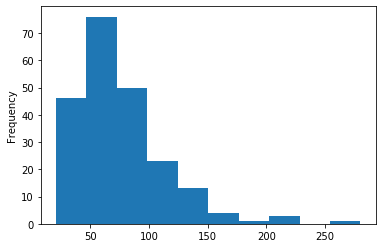

In [14]:
# M2 distribution
df['m2'].plot(kind = 'hist')

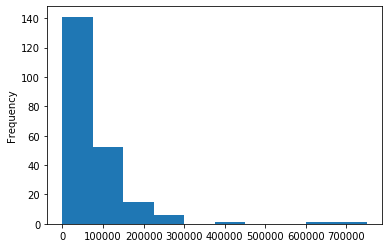

In [15]:
# Price distribution
df['price'].plot(kind = 'hist')

In [16]:
# Outliers
rooms = []
for room in df['rooms']:
    if room > round(df['rooms'].mean() + 3 * df['rooms'].std()):
        room = round(df['rooms'].mean() + 3*df['rooms'].std()) 
    rooms.append(room)
df['rooms'] = rooms 

m2 = []
for m in df['m2']:
    if m > round(df['m2'].mean() + 3 * df['m2'].std()):
        m = round(df['m2'].mean() + 3*df['m2'].std())
    m2.append(m)
df['m2']  = m2

prices = []
for price in df['price']:
    if price > df['price'].mean() + 3 * df['price'].std():
        price = df['price'].mean() + 3*df['price'].std()
    elif price < df['price'].mean() - df['price'].std():
        price = df['price'].mean() - df['price'].std()
    prices.append(price)
df['price'] = prices

In [17]:
df.describe()

,rooms,location,condition,m2,type,price
count,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000
mean,2.009217,0.267281,0.774194,75.631336,0.202765,78681.728539
std,0.952535,0.443564,0.419079,35.233120,0.402988,59687.878274
min,1.000000,0.000000,0.000000,21.000000,0.000000,243.790793
25%,1.000000,0.000000,1.000000,49.000000,0.000000,39429.000000
50%,2.000000,0.000000,1.000000,67.000000,0.000000,59548.000000
75%,3.000000,1.000000,1.000000,91.000000,0.000000,90000.000000
max,5.000000,1.000000,1.000000,190.000000,1.000000,328978.434073


In [18]:
# Feature Scaling
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#dfsc = sc.fit_transform(df)
#df['rooms'] = dfsc[:,0]
#df['m2'] = dfsc[:,3]
#df['price'] = dfsc[:,5]

In [19]:
df

,rooms,location,condition,m2,type,price
0,2.0,1,0,50,1,35000.0
1,1.0,0,0,37,1,35000.0
2,3.0,1,0,67,1,65000.0
3,2.0,1,0,21,1,15000.0
4,1.0,1,0,82,0,60000.0
...,...,...,...,...,...,...
212,2.0,0,1,65,0,46407.0
213,3.0,0,1,84,0,57678.0
214,3.0,0,1,93,0,63513.0
215,2.0,0,1,72,0,51121.0


In [20]:
# Exporting the dataset
df.to_csv('flats_prep.csv', sep=';', index=False)